In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.image_classification_dm import ImageClassificationDataModule
import albumentations as A 

trans = A.Compose([
	A.Resize(128, 128)
])

dm = ImageClassificationDataModule(batch_size = 25, train_trans=trans, val_trans=trans, shuffle=False)
dm.setup()

In [3]:
imgs, labels = next(iter(dm.train_dataloader()))

imgs.shape, labels.shape


(torch.Size([25, 128, 128, 3]), torch.Size([25]))

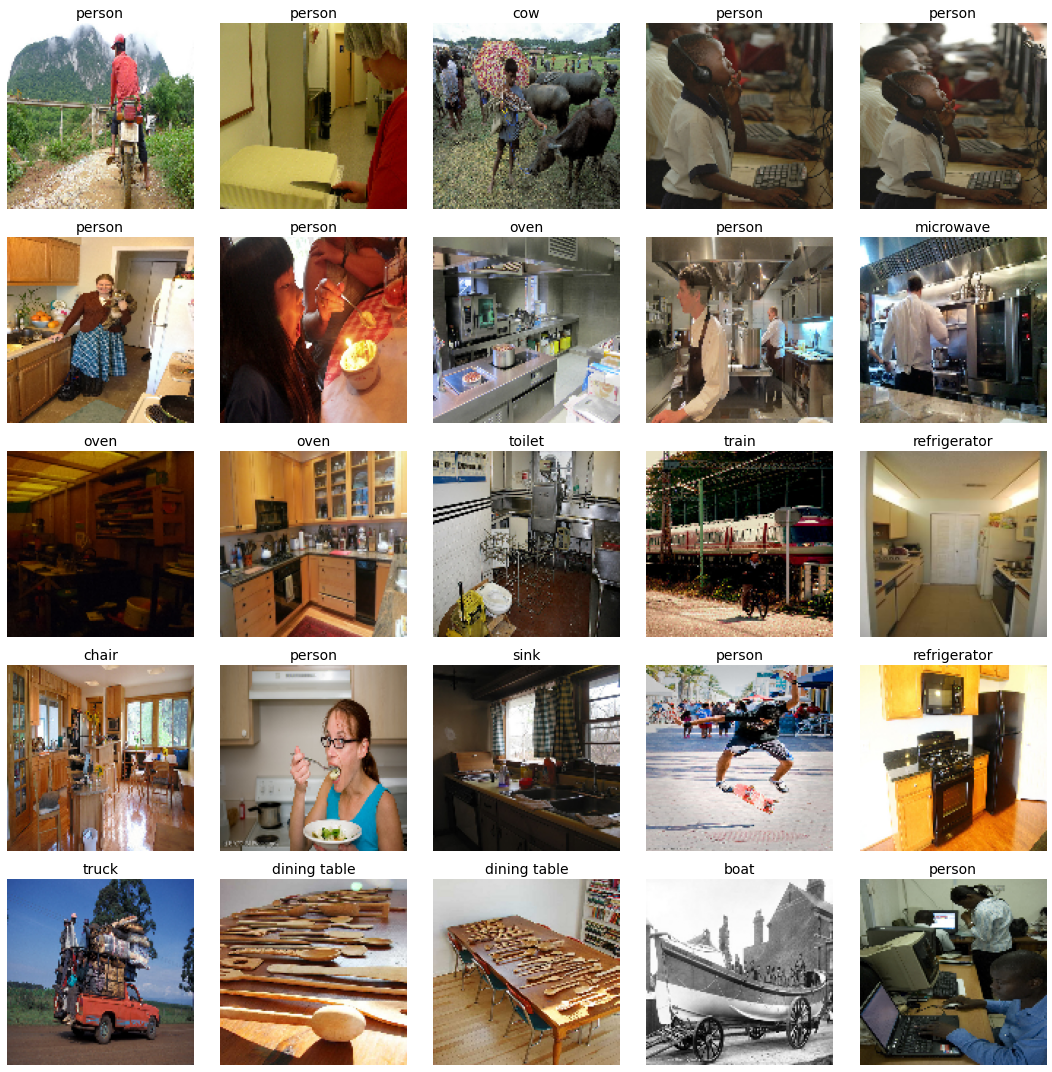

In [4]:
import matplotlib.pyplot as plt 

imgs, labels = next(iter(dm.train_dataloader()))
rs, cs = 5, 5
fig = plt.figure(figsize=(3*rs, 3*cs))
for i, (img, label) in enumerate(zip(imgs, labels)):
	ax = plt.subplot(rs, cs, i + 1)
	ax.imshow(img)
	class_label = next((d['name'] for d in dm.classes if d["id"] == label.item()), None)
	ax.set_title(class_label, fontsize=14)
	ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
from src.train import train 
import torch
from src.image_classifier_model import Model

dm = ImageClassificationDataModule(batch_size = 25, train_trans=trans, val_trans=trans, shuffle=False)
dm.setup()

dl = {
	'train': dm.train_dataloader(),
	'test': dm.val_dataloader()
}

model = Model(num_latents=128, latent_dime=256, num_blocks=3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [6]:
hist = train(model, dl, optimizer, epochs=300, overfit=True)

  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 1/300 loss 5.2050 acc 0.0000 test_loss 4.1862 test_acc 0.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 2/300 loss 4.1863 acc 0.0000 test_loss 3.6058 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 3/300 loss 3.6057 acc 0.4000 test_loss 3.3389 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 4/300 loss 3.3388 acc 0.4000 test_loss 3.1855 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 5/300 loss 3.1855 acc 0.4000 test_loss 3.0357 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 6/300 loss 3.0356 acc 0.4000 test_loss 2.9145 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 7/300 loss 2.9143 acc 0.4000 test_loss 2.8425 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 8/300 loss 2.8425 acc 0.4000 test_loss 2.7827 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 9/300 loss 2.7827 acc 0.4000 test_loss 2.7146 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 10/300 loss 2.7144 acc 0.4000 test_loss 2.6503 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 11/300 loss 2.6503 acc 0.4000 test_loss 2.6022 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 12/300 loss 2.6024 acc 0.4000 test_loss 2.5668 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 13/300 loss 2.5669 acc 0.4000 test_loss 2.5336 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 14/300 loss 2.5335 acc 0.4000 test_loss 2.4980 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 15/300 loss 2.4981 acc 0.4000 test_loss 2.4637 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 16/300 loss 2.4637 acc 0.4000 test_loss 2.4353 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 17/300 loss 2.4352 acc 0.4000 test_loss 2.4123 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 18/300 loss 2.4124 acc 0.4000 test_loss 2.3910 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 19/300 loss 2.3913 acc 0.4000 test_loss 2.3679 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 20/300 loss 2.3679 acc 0.4000 test_loss 2.3443 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 21/300 loss 2.3442 acc 0.4000 test_loss 2.3229 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 22/300 loss 2.3228 acc 0.4000 test_loss 2.3052 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 23/300 loss 2.3054 acc 0.4000 test_loss 2.2895 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 24/300 loss 2.2896 acc 0.4000 test_loss 2.2736 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 25/300 loss 2.2737 acc 0.4000 test_loss 2.2573 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 26/300 loss 2.2573 acc 0.4000 test_loss 2.2419 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 27/300 loss 2.2422 acc 0.4000 test_loss 2.2286 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 28/300 loss 2.2286 acc 0.4000 test_loss 2.2171 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 29/300 loss 2.2172 acc 0.4000 test_loss 2.2061 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 30/300 loss 2.2063 acc 0.4000 test_loss 2.1950 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 31/300 loss 2.1952 acc 0.4000 test_loss 2.1843 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 32/300 loss 2.1843 acc 0.4000 test_loss 2.1748 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 33/300 loss 2.1747 acc 0.4000 test_loss 2.1666 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 34/300 loss 2.1668 acc 0.4000 test_loss 2.1590 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 35/300 loss 2.1593 acc 0.4000 test_loss 2.1515 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 36/300 loss 2.1514 acc 0.4000 test_loss 2.1444 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 37/300 loss 2.1443 acc 0.4000 test_loss 2.1376 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 38/300 loss 2.1375 acc 0.4000 test_loss 2.1319 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 39/300 loss 2.1321 acc 0.4000 test_loss 2.1266 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 40/300 loss 2.1268 acc 0.4000 test_loss 2.1215 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 41/300 loss 2.1214 acc 0.4000 test_loss 2.1163 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 42/300 loss 2.1168 acc 0.4000 test_loss 2.1117 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 43/300 loss 2.1118 acc 0.4000 test_loss 2.1076 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 44/300 loss 2.1077 acc 0.4000 test_loss 2.1038 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 45/300 loss 2.1040 acc 0.4000 test_loss 2.1002 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 46/300 loss 2.0999 acc 0.4000 test_loss 2.0965 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 47/300 loss 2.0964 acc 0.4000 test_loss 2.0929 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 48/300 loss 2.0928 acc 0.4000 test_loss 2.0898 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 49/300 loss 2.0900 acc 0.4000 test_loss 2.0869 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 50/300 loss 2.0871 acc 0.4000 test_loss 2.0838 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 51/300 loss 2.0839 acc 0.4000 test_loss 2.0809 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 52/300 loss 2.0810 acc 0.4000 test_loss 2.0780 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 53/300 loss 2.0782 acc 0.4000 test_loss 2.0752 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 54/300 loss 2.0749 acc 0.4000 test_loss 2.0724 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 55/300 loss 2.0723 acc 0.4000 test_loss 2.0693 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 56/300 loss 2.0697 acc 0.4000 test_loss 2.0663 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 57/300 loss 2.0660 acc 0.4000 test_loss 2.0631 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 58/300 loss 2.0629 acc 0.4000 test_loss 2.0598 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 59/300 loss 2.0594 acc 0.4000 test_loss 2.0560 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 60/300 loss 2.0560 acc 0.4000 test_loss 2.0520 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 61/300 loss 2.0516 acc 0.4000 test_loss 2.0472 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 62/300 loss 2.0477 acc 0.4000 test_loss 2.0421 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 63/300 loss 2.0422 acc 0.4000 test_loss 2.0360 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 64/300 loss 2.0358 acc 0.4000 test_loss 2.0285 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 65/300 loss 2.0283 acc 0.4000 test_loss 2.0193 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 66/300 loss 2.0196 acc 0.4000 test_loss 2.0077 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 67/300 loss 2.0077 acc 0.4000 test_loss 1.9932 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 68/300 loss 1.9936 acc 0.4000 test_loss 1.9749 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 69/300 loss 1.9750 acc 0.4400 test_loss 1.9526 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 70/300 loss 1.9523 acc 0.4400 test_loss 1.9276 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 71/300 loss 1.9276 acc 0.4400 test_loss 1.9053 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 72/300 loss 1.9051 acc 0.4400 test_loss 1.8931 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 73/300 loss 1.8930 acc 0.4000 test_loss 1.8899 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 74/300 loss 1.8897 acc 0.4000 test_loss 1.8827 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 75/300 loss 1.8826 acc 0.4000 test_loss 1.8671 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 76/300 loss 1.8669 acc 0.4400 test_loss 1.8458 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 77/300 loss 1.8455 acc 0.4400 test_loss 1.8210 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 78/300 loss 1.8209 acc 0.4400 test_loss 1.7992 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 79/300 loss 1.7995 acc 0.4400 test_loss 1.7855 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 80/300 loss 1.7853 acc 0.4000 test_loss 1.7756 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 81/300 loss 1.7751 acc 0.4000 test_loss 1.7635 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 82/300 loss 1.7633 acc 0.4000 test_loss 1.7484 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 83/300 loss 1.7485 acc 0.4000 test_loss 1.7337 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 84/300 loss 1.7338 acc 0.4000 test_loss 1.7194 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 85/300 loss 1.7193 acc 0.4000 test_loss 1.7207 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 86/300 loss 1.7209 acc 0.4000 test_loss 1.7448 test_acc 0.3600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 87/300 loss 1.7449 acc 0.3600 test_loss 1.6550 test_acc 0.3600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 88/300 loss 1.6550 acc 0.3600 test_loss 1.7063 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 89/300 loss 1.7061 acc 0.4400 test_loss 1.6946 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 90/300 loss 1.6949 acc 0.4800 test_loss 1.6370 test_acc 0.3600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 91/300 loss 1.6374 acc 0.3600 test_loss 1.6837 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 92/300 loss 1.6835 acc 0.4400 test_loss 1.5991 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 93/300 loss 1.5988 acc 0.4400 test_loss 1.6499 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 94/300 loss 1.6502 acc 0.4800 test_loss 1.5777 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 95/300 loss 1.5777 acc 0.4400 test_loss 1.6214 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 96/300 loss 1.6211 acc 0.4000 test_loss 1.5548 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 97/300 loss 1.5547 acc 0.4400 test_loss 1.5895 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 98/300 loss 1.5897 acc 0.4800 test_loss 1.5346 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 99/300 loss 1.5343 acc 0.4800 test_loss 1.5577 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 100/300 loss 1.5576 acc 0.4800 test_loss 1.5138 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 101/300 loss 1.5135 acc 0.4800 test_loss 1.5236 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 102/300 loss 1.5239 acc 0.4800 test_loss 1.4923 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 103/300 loss 1.4922 acc 0.4800 test_loss 1.5075 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 104/300 loss 1.5071 acc 0.4400 test_loss 1.4509 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 105/300 loss 1.4512 acc 0.4800 test_loss 1.4537 test_acc 0.5200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 106/300 loss 1.4535 acc 0.5200 test_loss 1.4388 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 107/300 loss 1.4386 acc 0.4800 test_loss 1.3965 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]


Epoch 108/300 loss 1.3963 acc 0.6000 test_loss 1.4004 test_acc 0.5200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 109/300 loss 1.4006 acc 0.5200 test_loss 1.3873 test_acc 0.5600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 110/300 loss 1.3873 acc 0.5600 test_loss 1.3379 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 111/300 loss 1.3381 acc 0.6000 test_loss 1.3574 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 112/300 loss 1.3575 acc 0.6000 test_loss 1.3417 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 113/300 loss 1.3422 acc 0.4800 test_loss 1.2761 test_acc 0.5200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 114/300 loss 1.2759 acc 0.5200 test_loss 1.3100 test_acc 0.5200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 115/300 loss 1.3100 acc 0.5200 test_loss 1.3244 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 116/300 loss 1.3236 acc 0.4800 test_loss 1.3244 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 117/300 loss 1.3236 acc 0.4800 test_loss 1.2266 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 118/300 loss 1.2267 acc 0.4800 test_loss 1.2471 test_acc 0.5200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 119/300 loss 1.2470 acc 0.5200 test_loss 1.2469 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 120/300 loss 1.2466 acc 0.4800 test_loss 1.1756 test_acc 0.5600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 121/300 loss 1.1758 acc 0.5600 test_loss 1.2292 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 122/300 loss 1.2290 acc 0.4800 test_loss 1.1766 test_acc 0.5600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 123/300 loss 1.1768 acc 0.5600 test_loss 1.4869 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 124/300 loss 1.4869 acc 0.4400 test_loss 1.0964 test_acc 0.5200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 125/300 loss 1.0962 acc 0.5200 test_loss 1.4720 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 126/300 loss 1.4722 acc 0.4400 test_loss 1.1902 test_acc 0.5600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 127/300 loss 1.1906 acc 0.5600 test_loss 1.3229 test_acc 0.5200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 128/300 loss 1.3231 acc 0.5200 test_loss 1.0883 test_acc 0.5600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 129/300 loss 1.0882 acc 0.5600 test_loss 1.2622 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 130/300 loss 1.2623 acc 0.6000 test_loss 1.0985 test_acc 0.6400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 131/300 loss 1.0986 acc 0.6400 test_loss 1.1507 test_acc 0.4000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 132/300 loss 1.1504 acc 0.4000 test_loss 1.0531 test_acc 0.4800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 133/300 loss 1.0528 acc 0.4800 test_loss 1.1736 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 134/300 loss 1.1734 acc 0.4400 test_loss 1.1736 test_acc 0.4400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 135/300 loss 1.1734 acc 0.4400 test_loss 1.0352 test_acc 0.5600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 136/300 loss 1.0352 acc 0.5600 test_loss 1.0472 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 137/300 loss 1.0470 acc 0.6000 test_loss 1.0114 test_acc 0.6400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 138/300 loss 1.0113 acc 0.6400 test_loss 0.9937 test_acc 0.6800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 139/300 loss 0.9938 acc 0.6800 test_loss 0.9194 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 140/300 loss 0.9195 acc 0.6000 test_loss 0.9207 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 141/300 loss 0.9211 acc 0.6000 test_loss 0.8815 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 142/300 loss 0.8817 acc 0.6000 test_loss 0.8233 test_acc 0.6800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 143/300 loss 0.8233 acc 0.6800 test_loss 0.8145 test_acc 0.7200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 144/300 loss 0.8144 acc 0.7200 test_loss 0.8282 test_acc 0.6800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 145/300 loss 0.8279 acc 0.6800 test_loss 0.7415 test_acc 0.7200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 146/300 loss 0.7415 acc 0.7200 test_loss 0.7380 test_acc 0.6800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 147/300 loss 0.7378 acc 0.6800 test_loss 0.7355 test_acc 0.6800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 148/300 loss 0.7358 acc 0.6800 test_loss 0.6991 test_acc 0.6800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 149/300 loss 0.6990 acc 0.6800 test_loss 0.6684 test_acc 0.7200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 150/300 loss 0.6685 acc 0.7200 test_loss 0.6455 test_acc 0.7600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 151/300 loss 0.6454 acc 0.7600 test_loss 0.6264 test_acc 0.7600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 152/300 loss 0.6262 acc 0.7600 test_loss 0.6165 test_acc 0.8000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 153/300 loss 0.6166 acc 0.8000 test_loss 0.5866 test_acc 0.8000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 154/300 loss 0.5866 acc 0.8000 test_loss 0.5705 test_acc 0.7600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 155/300 loss 0.5705 acc 0.7600 test_loss 0.5880 test_acc 0.7200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 156/300 loss 0.5878 acc 0.7200 test_loss 0.5226 test_acc 0.8000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 157/300 loss 0.5226 acc 0.8000 test_loss 0.5236 test_acc 0.8000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 158/300 loss 0.5236 acc 0.7600 test_loss 0.5842 test_acc 0.7200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 159/300 loss 0.5841 acc 0.7200 test_loss 0.4696 test_acc 0.8800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 160/300 loss 0.4695 acc 0.8800 test_loss 0.5248 test_acc 0.8400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 161/300 loss 0.5247 acc 0.8400 test_loss 0.5362 test_acc 0.7600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 162/300 loss 0.5364 acc 0.7600 test_loss 0.4657 test_acc 0.8800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 163/300 loss 0.4653 acc 0.8800 test_loss 0.5279 test_acc 0.8800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 164/300 loss 0.5277 acc 0.8800 test_loss 0.5595 test_acc 0.8000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 165/300 loss 0.5596 acc 0.8000 test_loss 0.5595 test_acc 0.8000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 166/300 loss 0.5596 acc 0.8000 test_loss 1.4066 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 167/300 loss 1.4061 acc 0.6000 test_loss 1.4066 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 168/300 loss 1.4061 acc 0.6000 test_loss 0.5799 test_acc 0.7600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 169/300 loss 0.5798 acc 0.7600 test_loss 0.8279 test_acc 0.6800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 170/300 loss 0.8280 acc 0.6800 test_loss 1.1285 test_acc 0.6000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 171/300 loss 1.1288 acc 0.6000 test_loss 1.2761 test_acc 0.6400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 172/300 loss 1.2766 acc 0.6400 test_loss 0.7182 test_acc 0.6800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 173/300 loss 0.7185 acc 0.6800 test_loss 0.9344 test_acc 0.6400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 174/300 loss 0.9342 acc 0.6400 test_loss 0.6341 test_acc 0.7200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 175/300 loss 0.6340 acc 0.7200 test_loss 0.5450 test_acc 0.8400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 176/300 loss 0.5444 acc 0.8400 test_loss 0.6885 test_acc 0.7200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 177/300 loss 0.6883 acc 0.7200 test_loss 0.5606 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 178/300 loss 0.5604 acc 0.9200 test_loss 0.5501 test_acc 0.8000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 179/300 loss 0.5501 acc 0.8000 test_loss 0.5603 test_acc 0.8000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 180/300 loss 0.5602 acc 0.8000 test_loss 0.4755 test_acc 0.7600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 181/300 loss 0.4753 acc 0.7600 test_loss 0.4635 test_acc 0.8400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 182/300 loss 0.4636 acc 0.8400 test_loss 0.4628 test_acc 0.8400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 183/300 loss 0.4628 acc 0.8400 test_loss 0.4456 test_acc 0.8400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 184/300 loss 0.4457 acc 0.8400 test_loss 0.4294 test_acc 0.8400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 185/300 loss 0.4294 acc 0.8400 test_loss 0.4125 test_acc 0.8800


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 186/300 loss 0.4127 acc 0.8800 test_loss 0.4005 test_acc 0.8400


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 187/300 loss 0.4006 acc 0.8400 test_loss 0.3523 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 188/300 loss 0.3525 acc 0.9600 test_loss 0.3182 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 189/300 loss 0.3181 acc 0.9600 test_loss 0.3362 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 190/300 loss 0.3362 acc 0.9200 test_loss 0.3312 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 191/300 loss 0.3311 acc 0.9200 test_loss 0.3070 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 192/300 loss 0.3071 acc 0.9200 test_loss 0.2819 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 193/300 loss 0.2818 acc 0.9200 test_loss 0.2828 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 194/300 loss 0.2827 acc 0.9200 test_loss 0.2736 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 195/300 loss 0.2738 acc 0.9200 test_loss 0.2635 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 196/300 loss 0.2633 acc 0.9200 test_loss 0.2526 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 197/300 loss 0.2527 acc 0.9200 test_loss 0.2436 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 198/300 loss 0.2438 acc 0.9200 test_loss 0.2311 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 199/300 loss 0.2311 acc 0.9200 test_loss 0.2295 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 200/300 loss 0.2293 acc 0.9200 test_loss 0.2248 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 201/300 loss 0.2246 acc 0.9600 test_loss 0.2126 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 202/300 loss 0.2125 acc 0.9600 test_loss 0.2041 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 203/300 loss 0.2041 acc 0.9600 test_loss 0.1993 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 204/300 loss 0.1994 acc 0.9600 test_loss 0.1990 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 205/300 loss 0.1990 acc 0.9600 test_loss 0.1954 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 206/300 loss 0.1953 acc 0.9600 test_loss 0.1892 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 207/300 loss 0.1891 acc 0.9600 test_loss 0.1847 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 208/300 loss 0.1847 acc 0.9600 test_loss 0.1802 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 209/300 loss 0.1801 acc 0.9600 test_loss 0.1781 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 210/300 loss 0.1778 acc 0.9600 test_loss 0.1743 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 211/300 loss 0.1744 acc 0.9600 test_loss 0.1711 test_acc 0.9200


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 212/300 loss 0.1710 acc 1.0000 test_loss 0.1667 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 213/300 loss 0.1666 acc 0.9600 test_loss 0.1629 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 214/300 loss 0.1628 acc 0.9600 test_loss 0.1608 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 215/300 loss 0.1607 acc 0.9600 test_loss 0.1581 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 216/300 loss 0.1580 acc 0.9600 test_loss 0.1563 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 217/300 loss 0.1563 acc 0.9600 test_loss 0.1531 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 218/300 loss 0.1531 acc 0.9600 test_loss 0.1508 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 219/300 loss 0.1507 acc 0.9600 test_loss 0.1480 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 220/300 loss 0.1479 acc 0.9600 test_loss 0.1461 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 221/300 loss 0.1461 acc 0.9600 test_loss 0.1435 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 222/300 loss 0.1434 acc 0.9600 test_loss 0.1413 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 223/300 loss 0.1412 acc 0.9600 test_loss 0.1388 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 224/300 loss 0.1387 acc 0.9600 test_loss 0.1364 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 225/300 loss 0.1363 acc 0.9600 test_loss 0.1341 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 226/300 loss 0.1342 acc 0.9600 test_loss 0.1317 test_acc 0.9600



  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 227/300 loss 0.1317 acc 0.9600 test_loss 0.1294 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 228/300 loss 0.1294 acc 0.9600 test_loss 0.1266 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 229/300 loss 0.1266 acc 0.9600 test_loss 0.1239 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 230/300 loss 0.1240 acc 0.9600 test_loss 0.1210 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 231/300 loss 0.1211 acc 0.9600 test_loss 0.1181 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 232/300 loss 0.1180 acc 0.9600 test_loss 0.1150 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 233/300 loss 0.1150 acc 0.9600 test_loss 0.1116 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 234/300 loss 0.1116 acc 0.9600 test_loss 0.1082 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 235/300 loss 0.1082 acc 1.0000 test_loss 0.1048 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 236/300 loss 0.1047 acc 1.0000 test_loss 0.1016 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 237/300 loss 0.1015 acc 1.0000 test_loss 0.0982 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 238/300 loss 0.0982 acc 1.0000 test_loss 0.0953 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 239/300 loss 0.0953 acc 0.9600 test_loss 0.0924 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 240/300 loss 0.0924 acc 0.9600 test_loss 0.0897 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 241/300 loss 0.0897 acc 0.9600 test_loss 0.0871 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 242/300 loss 0.0872 acc 1.0000 test_loss 0.0846 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 243/300 loss 0.0846 acc 1.0000 test_loss 0.0822 test_acc 0.9600



  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 244/300 loss 0.0823 acc 0.9600 test_loss 0.0800 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 245/300 loss 0.0800 acc 1.0000 test_loss 0.0778 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 246/300 loss 0.0778 acc 1.0000 test_loss 0.0758 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 247/300 loss 0.0759 acc 1.0000 test_loss 0.0737 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 248/300 loss 0.0736 acc 1.0000 test_loss 0.0716 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 249/300 loss 0.0716 acc 1.0000 test_loss 0.0693 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 250/300 loss 0.0693 acc 1.0000 test_loss 0.0666 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 251/300 loss 0.0667 acc 1.0000 test_loss 0.0638 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 252/300 loss 0.0638 acc 1.0000 test_loss 0.0623 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 253/300 loss 0.0624 acc 1.0000 test_loss 0.0804 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 254/300 loss 0.0804 acc 0.9600 test_loss 0.0712 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 255/300 loss 0.0712 acc 0.9600 test_loss 0.0621 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 256/300 loss 0.0621 acc 1.0000 test_loss 0.0629 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 257/300 loss 0.0629 acc 1.0000 test_loss 0.0641 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 258/300 loss 0.0641 acc 1.0000 test_loss 0.0614 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 259/300 loss 0.0614 acc 1.0000 test_loss 0.0552 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 260/300 loss 0.0553 acc 1.0000 test_loss 0.0769 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 261/300 loss 0.0768 acc 0.9600 test_loss 0.0801 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 262/300 loss 0.0801 acc 0.9600 test_loss 0.0645 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 263/300 loss 0.0644 acc 0.9600 test_loss 0.0528 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 264/300 loss 0.0529 acc 1.0000 test_loss 0.0733 test_acc 0.9600


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 265/300 loss 0.0733 acc 0.9600 test_loss 0.0485 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 266/300 loss 0.0485 acc 1.0000 test_loss 0.0549 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 267/300 loss 0.0548 acc 1.0000 test_loss 0.0505 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 268/300 loss 0.0504 acc 1.0000 test_loss 0.0347 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 269/300 loss 0.0347 acc 1.0000 test_loss 0.0573 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 270/300 loss 0.0572 acc 1.0000 test_loss 0.0469 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 271/300 loss 0.0469 acc 1.0000 test_loss 0.0541 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 272/300 loss 0.0540 acc 1.0000 test_loss 0.0297 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 273/300 loss 0.0297 acc 1.0000 test_loss 0.0455 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 274/300 loss 0.0455 acc 1.0000 test_loss 0.0399 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 275/300 loss 0.0399 acc 1.0000 test_loss 0.0269 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 276/300 loss 0.0269 acc 1.0000 test_loss 0.0237 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 277/300 loss 0.0237 acc 1.0000 test_loss 0.0289 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 278/300 loss 0.0289 acc 1.0000 test_loss 0.0244 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 279/300 loss 0.0244 acc 1.0000 test_loss 0.0209 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 280/300 loss 0.0209 acc 1.0000 test_loss 0.0202 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 281/300 loss 0.0202 acc 1.0000 test_loss 0.0210 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 282/300 loss 0.0210 acc 1.0000 test_loss 0.0176 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 283/300 loss 0.0176 acc 1.0000 test_loss 0.0175 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 284/300 loss 0.0175 acc 1.0000 test_loss 0.0187 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 285/300 loss 0.0187 acc 1.0000 test_loss 0.0181 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 286/300 loss 0.0181 acc 1.0000 test_loss 0.0156 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 287/300 loss 0.0155 acc 1.0000 test_loss 0.0135 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 288/300 loss 0.0135 acc 1.0000 test_loss 0.0130 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 289/300 loss 0.0130 acc 1.0000 test_loss 0.0137 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 290/300 loss 0.0137 acc 1.0000 test_loss 0.0140 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 291/300 loss 0.0140 acc 1.0000 test_loss 0.0128 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 292/300 loss 0.0128 acc 1.0000 test_loss 0.0115 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 293/300 loss 0.0115 acc 1.0000 test_loss 0.0110 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 294/300 loss 0.0110 acc 1.0000 test_loss 0.0109 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 295/300 loss 0.0109 acc 1.0000 test_loss 0.0110 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 296/300 loss 0.0111 acc 1.0000 test_loss 0.0111 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 297/300 loss 0.0111 acc 1.0000 test_loss 0.0109 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 298/300 loss 0.0109 acc 1.0000 test_loss 0.0103 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 299/300 loss 0.0103 acc 1.0000 test_loss 0.0097 test_acc 1.0000


  0%|          | 0/4691 [00:00<?, ?it/s]

Epoch 300/300 loss 0.0097 acc 1.0000 test_loss 0.0093 test_acc 1.0000


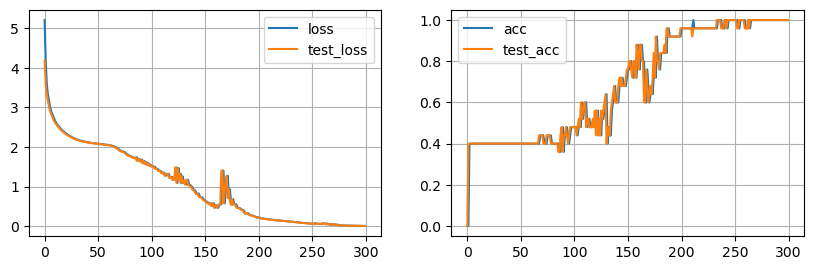

In [7]:
from src.train import plot_hist 

plot_hist(hist)

In [8]:
dm = ImageClassificationDataModule(batch_size = 128, train_trans=trans, val_trans=trans, num_workers=20, pin_memory=True, shuffle=True)
dm.setup()

dl = {
	'train': dm.train_dataloader(),
	'test': dm.val_dataloader()
}

model = Model(num_latents=128, latent_dime=256, num_blocks=3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [9]:
hist = train(model, dl, optimizer, epochs=10, overfit=False)

  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 1/10 loss 3.1791 acc 0.3257 test_loss 3.0814 test_acc 0.3151


  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 2/10 loss 2.9864 acc 0.3278 test_loss 2.9254 test_acc 0.3200


  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 3/10 loss 2.8204 acc 0.3356 test_loss 2.8158 test_acc 0.3294


  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 4/10 loss 2.7163 acc 0.3484 test_loss 2.7018 test_acc 0.3423


  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 5/10 loss 2.6356 acc 0.3593 test_loss 2.6373 test_acc 0.3509


  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 6/10 loss 2.5707 acc 0.3690 test_loss 2.5905 test_acc 0.3630


  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 7/10 loss 2.5160 acc 0.3790 test_loss 2.5394 test_acc 0.3703


  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 8/10 loss 2.4646 acc 0.3874 test_loss 2.4970 test_acc 0.3716


  0%|          | 0/917 [00:00<?, ?it/s]

Epoch 9/10 loss 2.4127 acc 0.3975 test_loss 2.4699 test_acc 0.3812


testing... loss 2.4316 acc 0.3860: 100%|██████████| 39/39 [00:08<00:00,  4.66it/s]

Epoch 10/10 loss 2.3655 acc 0.4027 test_loss 2.4316 test_acc 0.3860


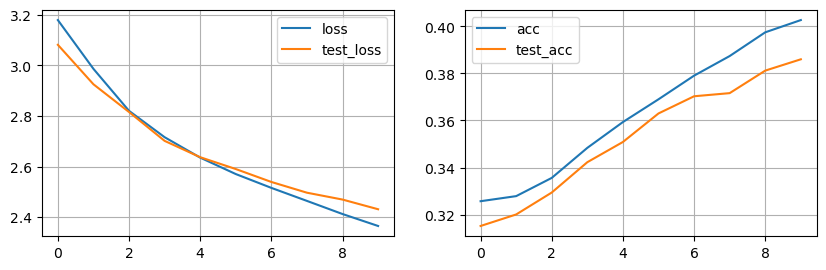

In [10]:
plot_hist(hist)